In [2]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 20)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',50)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
Dataset=pd.read_csv("F:\Projects\Blood Donation\Data\BloodDonation.csv")
Dataset.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
Dataset.shape

(748, 5)

In [46]:
df=Dataset.copy(deep=True)
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [47]:
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [48]:
df.columns = ["Recency", "Frequency", "Monetary", "Time", "Donated"]
df.head()

,Recency,Frequency,Monetary,Time,Donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [56]:
df.shape

(748, 5)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Donated    748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [49]:
df.value_counts()

Recency  Frequency  Monetary  Time  Donated
4        1          250       4     0          27
2        1          250       2     0          27
16       1          250       16    0          17
14       1          250       14    0          16
21       1          250       21    0          15
                                               ..
4        6          1500      30    0           1
                              28    1           1
                              23    1           1
                              16    1           1
74       1          250       74    0           1
Length: 533, dtype: int64

In [50]:
df.duplicated().any()

True

In [51]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
743    False
744    False
745    False
746    False
747    False
Length: 748, dtype: bool

In [52]:
df.drop_duplicates()

,Recency,Frequency,Monetary,Time,Donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [53]:
df.duplicated().any().sum()

1

<Axes: xlabel='Monetary', ylabel='Time'>

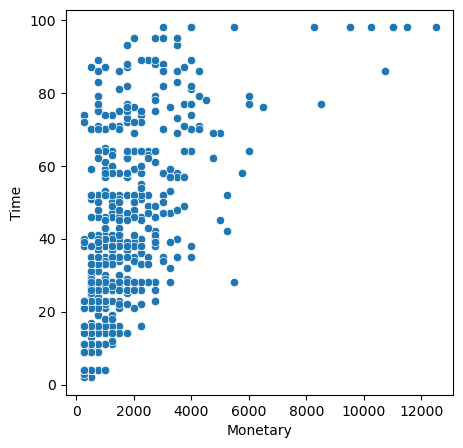

In [54]:
sns.scatterplot(x=df['Monetary'],y=df['Time'])

<Axes: >

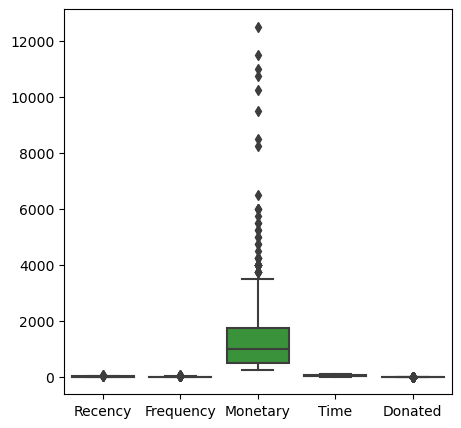

In [58]:
sns.boxplot(df)

<Axes: >

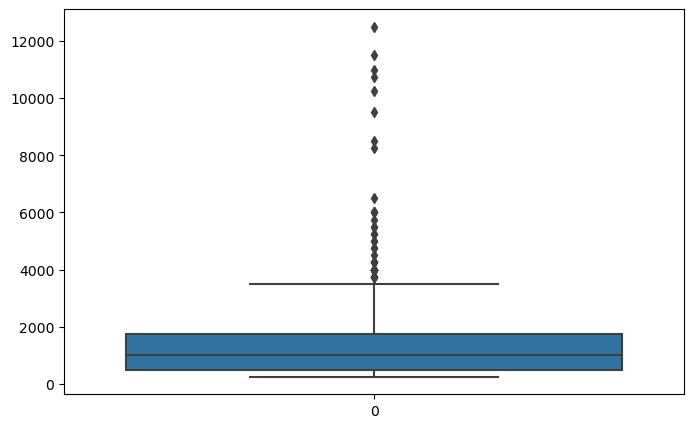

In [ ]:
sns.boxplot(df['Monetary'])

In [ ]:
Q1 = df['Monetary'].quantile(0.25)
Q3 = df['Monetary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
df = df[(df['Monetary'] >= lower_bound) & (df['Monetary'] <= upper_bound)]


In [ ]:
df.shape

(703, 5)

<Axes: >

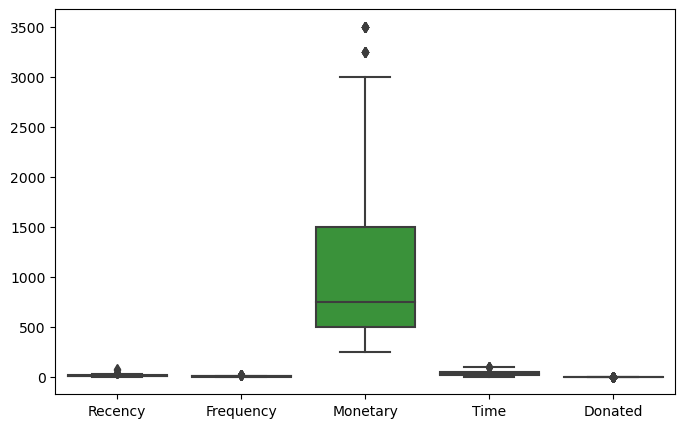

In [ ]:
sns.boxplot(df)

array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>],
       [<Axes: title={'center': 'Monetary'}>,
        <Axes: title={'center': 'Time'}>],
       [<Axes: title={'center': 'Donated'}>, <Axes: >]], dtype=object)

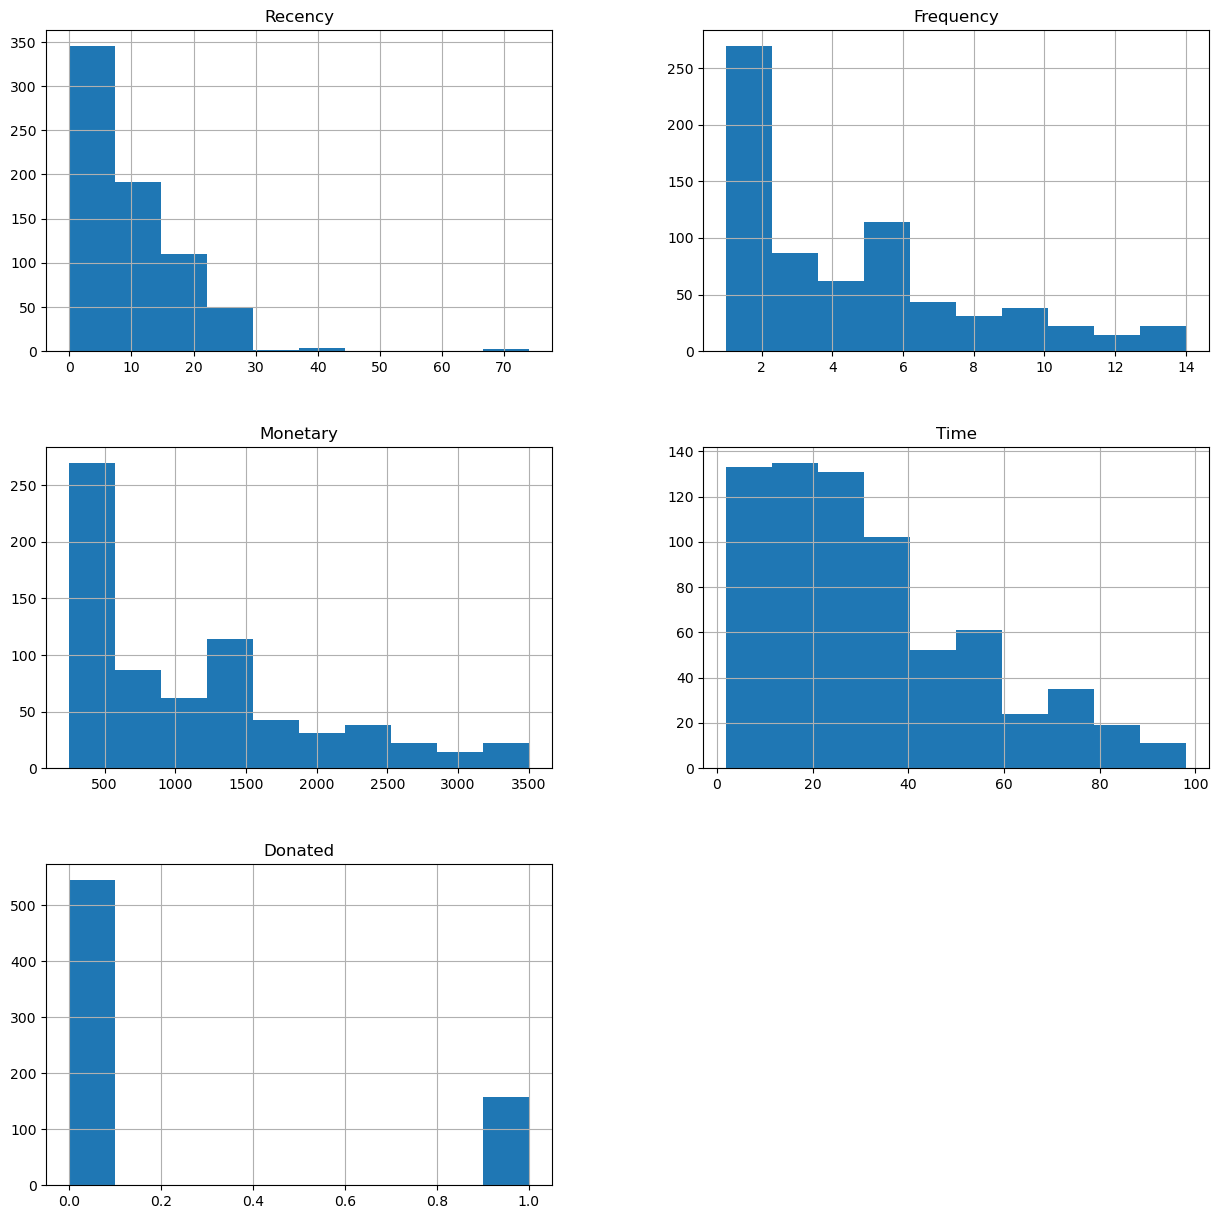

In [ ]:
df.hist(figsize=(15, 15))

In [ ]:
df['Donated'].value_counts()

0    545
1    158
Name: Donated, dtype: int64

In [ ]:
df.describe()

,Recency,Frequency,Monetary,Time,Donated
count,703.000000,703.000000,703.000000,703.000000,703.000000
mean,9.645804,4.448080,1112.019915,31.783784,0.224751
std,8.163291,3.391765,847.941140,22.512267,0.417715
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,3.000000,2.000000,500.000000,14.000000,0.000000
50%,9.000000,3.000000,750.000000,26.000000,0.000000
75%,14.000000,6.000000,1500.000000,46.000000,0.000000
max,74.000000,14.000000,3500.000000,98.000000,1.000000


In [59]:
print("Chance of donation where donor is having low recency:",df[df["Recency"]<3]['Donated'].mean())
print("Chance of donation where donor is having high recency:",df[df["Recency"]>14]['Donated'].mean())

print(".................................................................")


print("Chance of donation where donor is having low Frequency:",df[df["Frequency"]<2]['Donated'].mean())
print("Chance of donation where donor is having high Frequency:",df[df["Frequency"]>6]['Donated'].mean())

print(".................................................................")


print("Chance of donation where donor is having low Monetary:",df[df["Monetary"]<500]['Donated'].mean())
print("Chance of donation where donor is having high Monetary:",df[df["Monetary"]>1500]['Donated'].mean())

print(".................................................................")


print("Chance of donation where donor is having low Time:",df[df["Time"]<14]['Donated'].mean())
print("Chance of donation where donor is having high Time:",df[df["Time"]>46]['Donated'].mean())

Chance of donation where donor is having low recency: 0.37433155080213903
Chance of donation where donor is having high recency: 0.06936416184971098
.................................................................
Chance of donation where donor is having low Frequency: 0.12658227848101267
Chance of donation where donor is having high Frequency: 0.3488372093023256
.................................................................
Chance of donation where donor is having low Monetary: 0.12658227848101267
Chance of donation where donor is having high Monetary: 0.3488372093023256
.................................................................
Chance of donation where donor is having low Time: 0.26666666666666666
Chance of donation where donor is having high Time: 0.19902912621359223


<Axes: xlabel='Donated', ylabel='Monetary'>

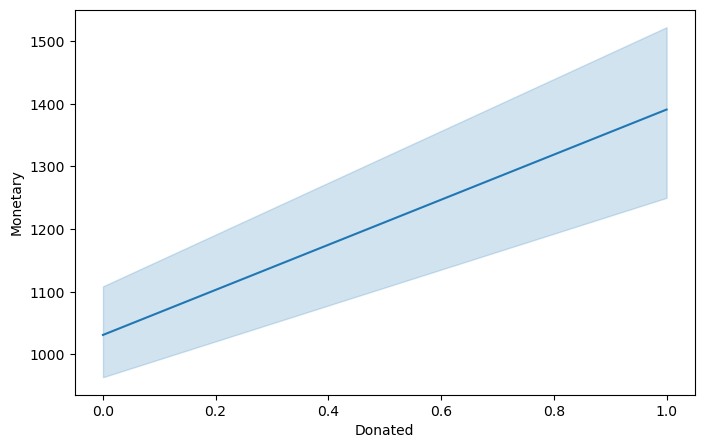

In [ ]:
sns.lineplot(x=df['Donated'],y=df['Monetary'],legend='auto')

<Axes: >

C:\Users\siva\AppData\Local\Temp\ipykernel_17396\1844714099.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Recency"], color="orange")


<Axes: xlabel='Recency', ylabel='Density'>

Text(0.5, 0, 'Recency')

<Axes: >

C:\Users\siva\AppData\Local\Temp\ipykernel_17396\1844714099.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Frequency"], color="darkblue")


<Axes: xlabel='Frequency', ylabel='Density'>

Text(0.5, 0, 'Frequency')

<Axes: >

C:\Users\siva\AppData\Local\Temp\ipykernel_17396\1844714099.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Monetary"], color="green")


<Axes: xlabel='Monetary', ylabel='Density'>

Text(0.5, 0, 'Monetary')

<Axes: >

C:\Users\siva\AppData\Local\Temp\ipykernel_17396\1844714099.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Time"], color="red")


<Axes: xlabel='Time', ylabel='Density'>

Text(0.5, 0, 'Time')

Text(0.5, 0.98, 'Distribution of donation factors')

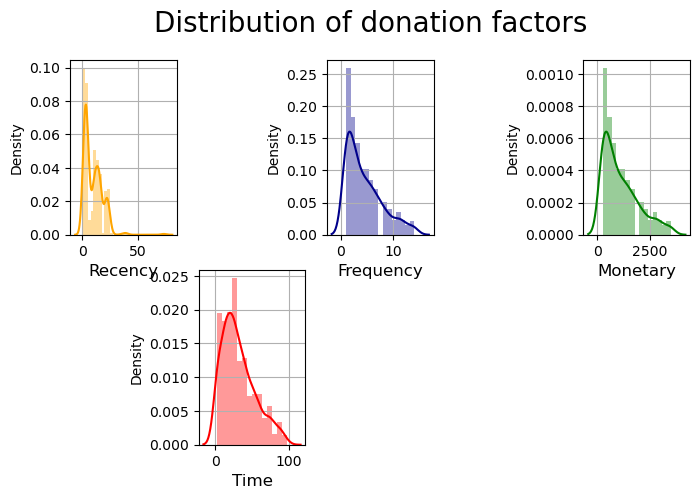

In [ ]:
plt.subplot(2,5,1)
sns.distplot(df["Recency"], color="orange")
plt.xlabel("Recency",fontsize=12)
plt.grid()

plt.subplot(2,5,3)
sns.distplot(df["Frequency"], color="darkblue")
plt.xlabel("Frequency",fontsize=12)
plt.grid()

plt.subplot(2,5,5)
sns.distplot(df["Monetary"], color="green")
plt.xlabel("Monetary",fontsize=12)
plt.grid()

plt.subplot(2,5,7)
sns.distplot(df["Time"], color="red")
plt.xlabel("Time",fontsize=12)
plt.grid()

plt.suptitle("Distribution of donation factors",fontsize=20)
plt.show()

In [ ]:
df.head()

,Recency,Frequency,Monetary,Time,Donated
1,0,13,3250,28,1
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1


c:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Donated', ylabel='Frequency'>

c:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 40.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


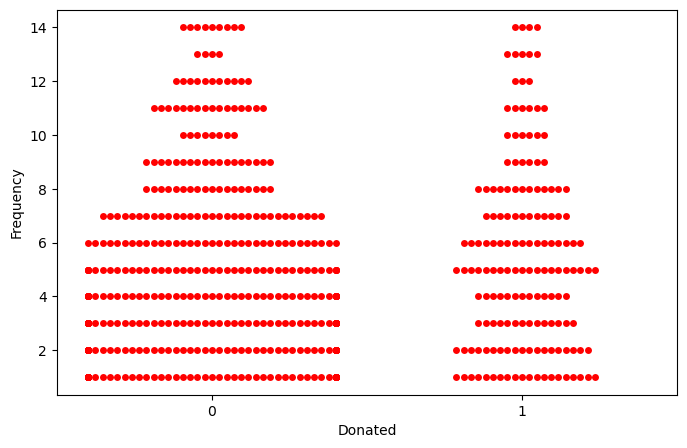

In [ ]:
sns.swarmplot(x=df['Donated'],y=df['Frequency'],color='red')

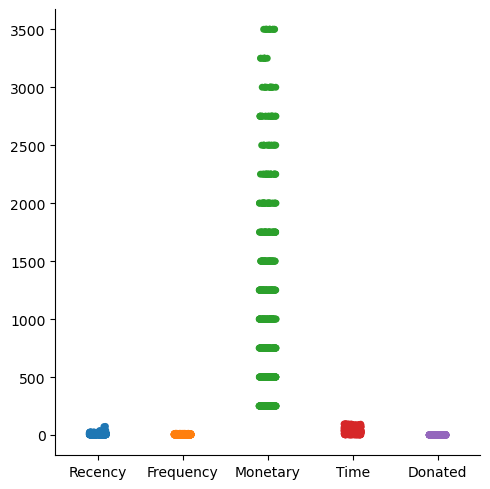

In [ ]:
sns.catplot(df)

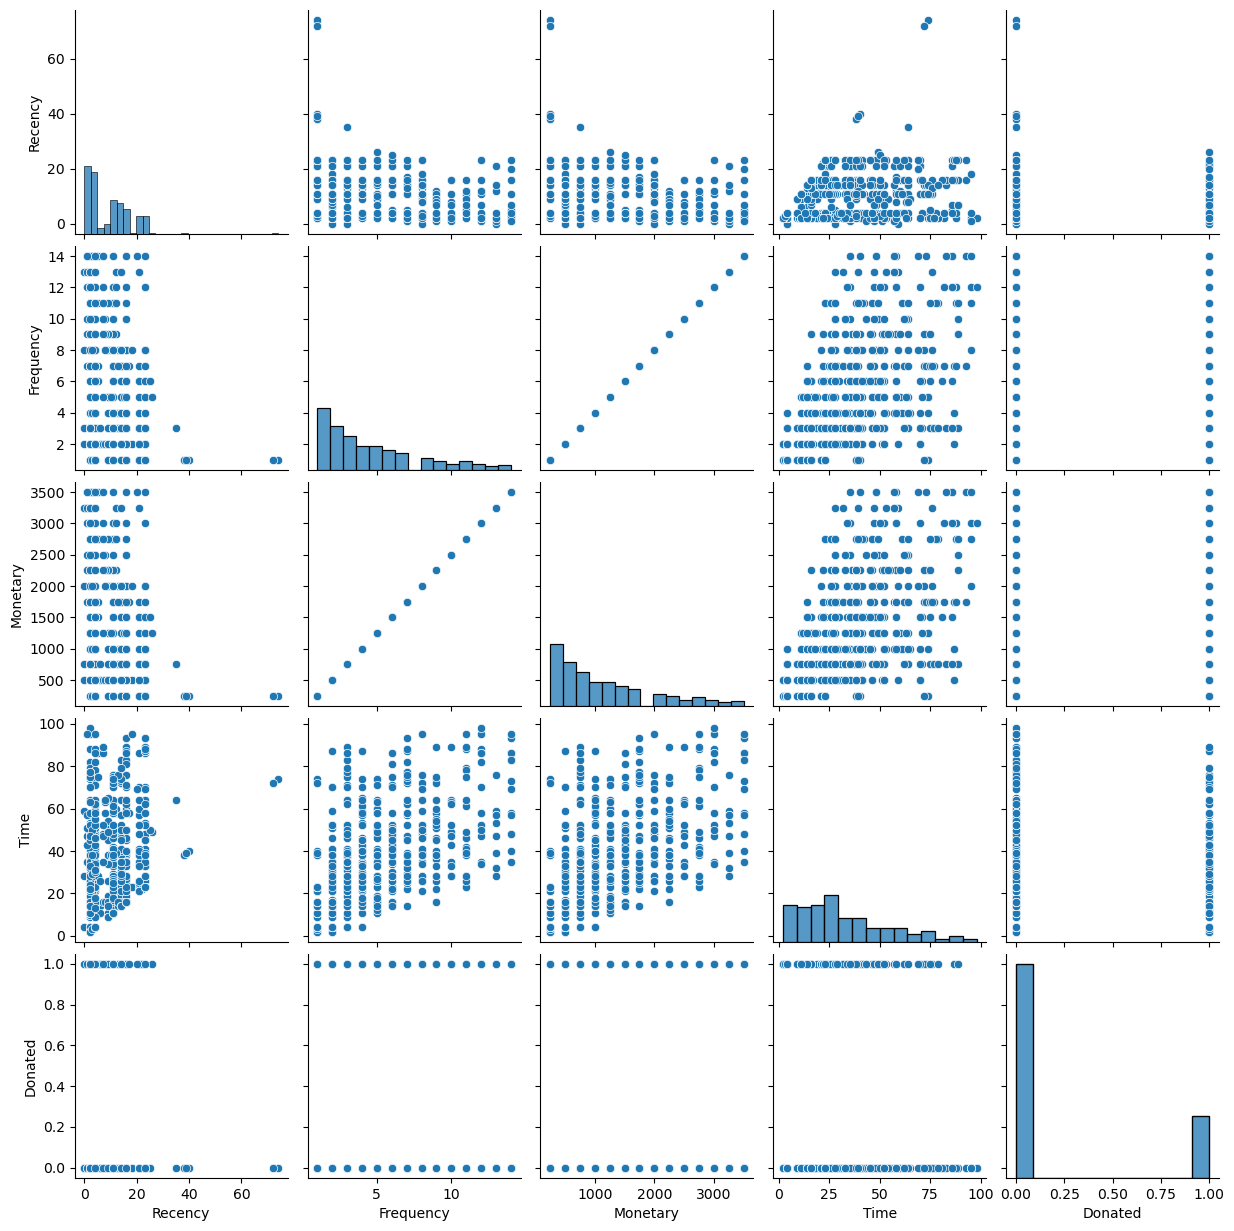

In [ ]:
sns.pairplot(df)

In [ ]:
df.head()

,Recency,Frequency,Monetary,Time,Donated
1,0,13,3250,28,1
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1


In [ ]:
X = df.drop("Donated", axis=1)  
y = df["Donated"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

RandomForestClassifier()

0.7801418439716312

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)

LogisticRegression()

0.7801418439716312

<Axes: >

Text(0.5, 1.0, 'Confusion matrix for logistic regression')

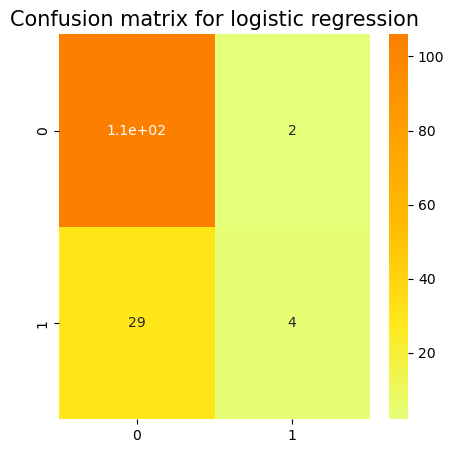

In [ ]:
from sklearn.metrics import confusion_matrix

#lets print the confusion matrix first
plt.rcParams["figure.figsize"]=(5,5)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Wistia')
plt.title("Confusion matrix for logistic regression",fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.98      0.87       108
           1       0.67      0.12      0.21        33

    accuracy                           0.78       141
   macro avg       0.73      0.55      0.54       141
weighted avg       0.76      0.78      0.72       141



In [ ]:
df.head()

,Recency,Frequency,Monetary,Time,Donated
1,0,13,3250,28,1
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1


In [ ]:
prediction=logreg.predict((np.array([[24,3,526,28]])))

print("The chance of donation by a donor for given factors is:",prediction)

The chance of donation by a donor for given factors is: [0]


c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
pickle.dump(logreg,open('F:/Projects/Blood Donation/model.pkl','wb'))

In [ ]:
pip install flask

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from flask import Flask
app = Flask(__name__)